In [ ]:
#hide
import sys
sys.path.append('..')

# Fastseq

> A way to use fastai with sequence data

This file will become your README and also the index of your documentation.

## How to use

In [ ]:
from fastseq.all import *
from fastseq.data.external import *
from fastai.basics import *
from fastseq.models.dnn import *

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Getting the data fastai style:

In [ ]:
items = dummy_data_generator(50,10, nrows=100)

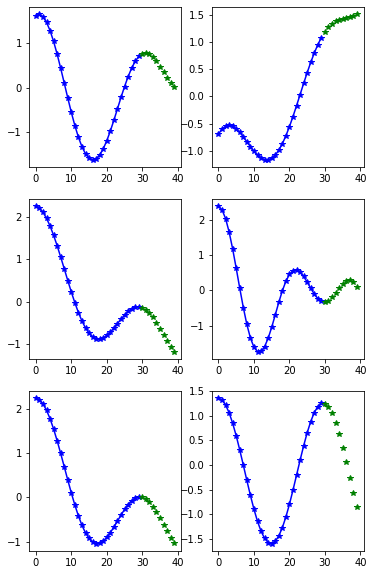

In [ ]:
dbunch = TSDataLoaders.from_items(items, horizon = 10)
dbunch.show_batch(max_n=6)

In [ ]:
# TODO make custom learner with custom model
learn = dnn_learner(dbunch)

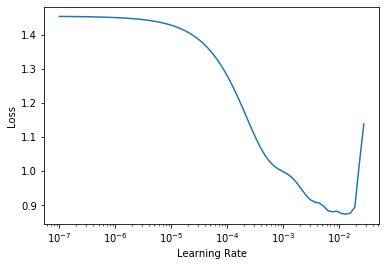

In [ ]:
from fastai.callback.all import *
learn.lr_find()

In [ ]:
learn.fit(1, .1)

epoch,train_loss,valid_loss,mae,smape,time
0,1.453070,4.777847,1.867023,159.737488,00:00


In [ ]:
l = [(o[0],o[1]) for o in learn.dbunch.train_dl]
x,y = l[0]

In [ ]:
interp = Interpretation.from_learner(learn)

test_eq(interp.inputs, x)
test_eq(interp.targs, y)
out = learn.model.a * x + learn.model.b
test_eq(interp.preds, out)
test_eq(interp.losses, (out-y)[:,0]**2)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _th_equal